In [66]:
import lib
import tensorflow as tf
import numpy as np
import networks
from RobustVAE import L0VAE

from matplotlib import pyplot as plt
%matplotlib inline

In [82]:
n_in = 2
n_cts = 2
n_sparse = 50



encoder = networks.MLP(n_in, n_cts*2+n_sparse, 2, [300,300])
decoder = networks.MLP(n_cts+n_sparse, n_in, 2, [300,300])

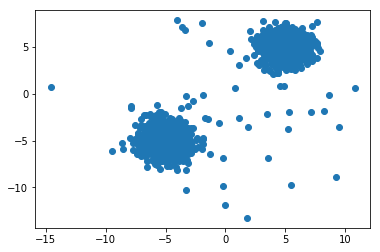

In [83]:
n = 1000
x = np.vstack((np.random.normal(-5, size=(n, n_in)), np.random.normal(5, size=(n, n_in)), np.random.normal(0, 5, size=(50, n_in))))
plt.scatter(x[:,0], x[:,1])

In [84]:
l0vae = L0VAE(encoder, decoder, n_cts, n_sparse)

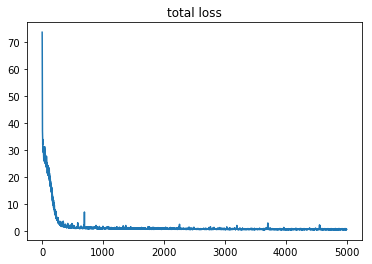

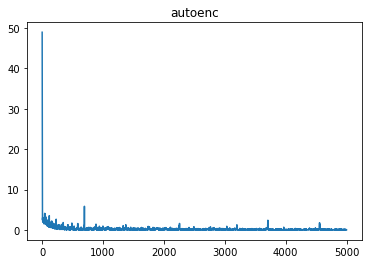

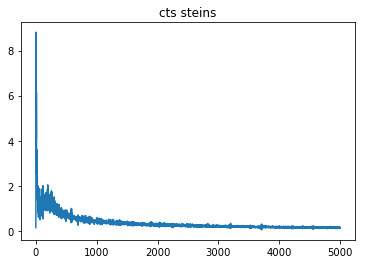

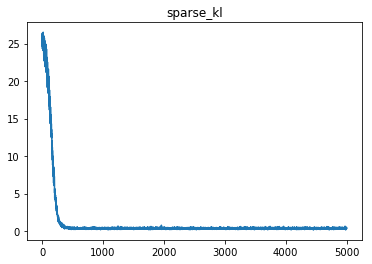

In [85]:
l0vae.train(x, sparsity=.1, iters = 5000, batch_size=64, lr=.002)

In [86]:
z = l0vae.encode(x)

In [87]:
dense_z = z[:, :n_cts]
dense_z

array([[-0.61911541,  0.60828531],
       [-1.10176778, -0.16922857],
       [-0.78491575,  0.54344946],
       ..., 
       [-2.17949653, -4.19436836],
       [ 2.12543321,  3.62001729],
       [-1.56987119, -1.88044918]], dtype=float32)

In [88]:
sparse_z = z[:, n_cts:]
sparse_z

array([[  6.27134194e-16,   3.09283758e-04,   4.56659958e-14, ...,
          2.19260087e-07,   2.17433444e-05,   5.93292317e-16],
       [  3.79533624e-33,   1.08709726e-23,   7.94552565e-15, ...,
          9.99150395e-01,   1.70111912e-06,   1.87566296e-10],
       [  4.07523962e-16,   3.27458686e-22,   2.28644186e-03, ...,
          1.13940216e-13,   9.99944687e-01,   1.71436227e-12],
       ..., 
       [  1.44687951e-12,   1.53829728e-03,   2.39037377e-20, ...,
          7.59607655e-11,   1.71146150e-19,   2.56677307e-02],
       [  6.19271398e-01,   8.80118896e-05,   3.44458229e-12, ...,
          1.22484767e-06,   7.20083237e-01,   9.99990463e-01],
       [  9.81192572e-10,   2.87687408e-06,   4.53109460e-11, ...,
          3.81023643e-17,   7.08497887e-12,   9.16992090e-12]], dtype=float32)

In [89]:
sparse_hard = (np.abs(sparse_z - 1) < .1).astype(int)
sparse_hard

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
np.mean(sparse_hard)

0.080917073170731713

In [90]:
sparse_zeros = np.zeros((x.shape[0], n_sparse))

In [91]:
z_hard = np.hstack((dense_z, sparse_hard))
z_zeros = np.hstack((dense_z, sparse_zeros))

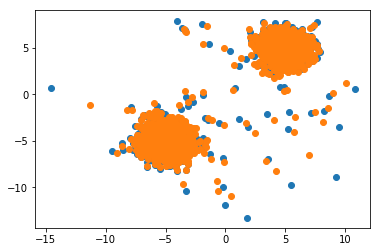

In [92]:
xhat = l0vae.sess.run(decoder(z))
plt.scatter(x[:,0], x[:,1])
plt.scatter(xhat[:,0], xhat[:,1])

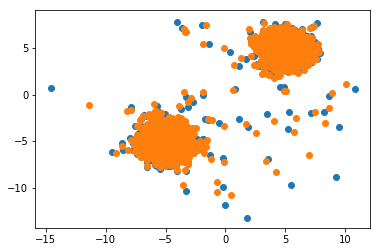

In [93]:
xhat = l0vae.sess.run(decoder(z_hard))
plt.scatter(x[:,0], x[:,1])
plt.scatter(xhat[:,0], xhat[:,1])

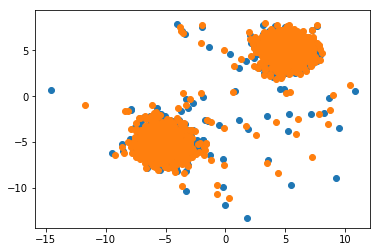

In [94]:
xhat = l0vae.sess.run(decoder(z_zeros))
plt.scatter(x[:,0], x[:,1])
plt.scatter(xhat[:,0], xhat[:,1])